#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [ ]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

In [13]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

Saving car_evaluation.zip to car_evaluation (2).zip


In [106]:
pip install graphviz

In [186]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
from sklearn.tree import plot_tree
import graphviz

In [187]:
if 'car_evaluation (2).zip' in uploaded:
    zip_file = uploaded['car_evaluation (2).zip']
    # rest of your code
data = []

In [188]:
with ZipFile(BytesIO(zip_file)) as zip_ref:
    csv_files = zip_ref.namelist()
    data = [pd.read_csv(zip_ref.open(file)) for file in csv_files]

In [190]:
# Concatenate dataframes
df = pd.concat(data, ignore_index=True)

In [194]:
# Display the first few rows of the merged dataframe
print(df.head())

  buyPrice maintCost noDoors noPersons bootLuggage safety decision
0    vhigh     vhigh       2         2       small    med    unacc
1    vhigh     vhigh       2         2       small   high    unacc
2    vhigh     vhigh       2         2         med    low    unacc
3    vhigh     vhigh       2         2         med    med    unacc
4    vhigh     vhigh       2         2         med   high    unacc


In [195]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [196]:
print(df['decision'].value_counts())

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64


In [197]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety'])

In [198]:
# Map the 'decision' column to numerical values
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
df['decision'] = df['decision'].map(class_mapping)

In [199]:
# Define feature columns and target variable
X = df.drop(columns=['decision'])
y = df['decision']

In [200]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1381, 21)
(346, 21)
(1381,)
(346,)


In [212]:
# Convert numerical class labels to strings
class_names_str = list(map(str, y.unique()))

In [213]:
def train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return clf, accuracy

In [214]:
# evaluation with different criteria
criteria = ['entropy', 'gini', 'log_loss']
models = {}

In [218]:
for criterion in criteria:
    model, accuracy = train_evaluate_decision_tree(X_train, y_train, X_test, y_test, criterion)
    models[criterion] = {'model': model, 'accuracy': accuracy, 'confusion_matrix':conf_matrix, 'classfication_report':classification_rep}
    print(f"Accuracy of {criterion}: {accuracy}")
    print(f"Classification Report of {criterion}:\n", classification_rep)
    print(f"Confusion Matrix of {criterion}:\n", conf_matrix)

Accuracy of entropy: 0.953757225433526
Classification Report of entropy:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       237
           1       0.96      0.91      0.93        77
           2       0.75      0.80      0.77        15
           3       0.76      0.76      0.76        17

    accuracy                           0.95       346
   macro avg       0.86      0.87      0.86       346
weighted avg       0.95      0.95      0.95       346

Confusion Matrix of entropy:
 [[235   2   0   0]
 [  5  70   1   1]
 [  0   0  12   3]
 [  0   1   3  13]]
Accuracy of gini: 0.9595375722543352
Classification Report of gini:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       237
           1       0.96      0.91      0.93        77
           2       0.75      0.80      0.77        15
           3       0.76      0.76      0.76        17

    accuracy                           0.95

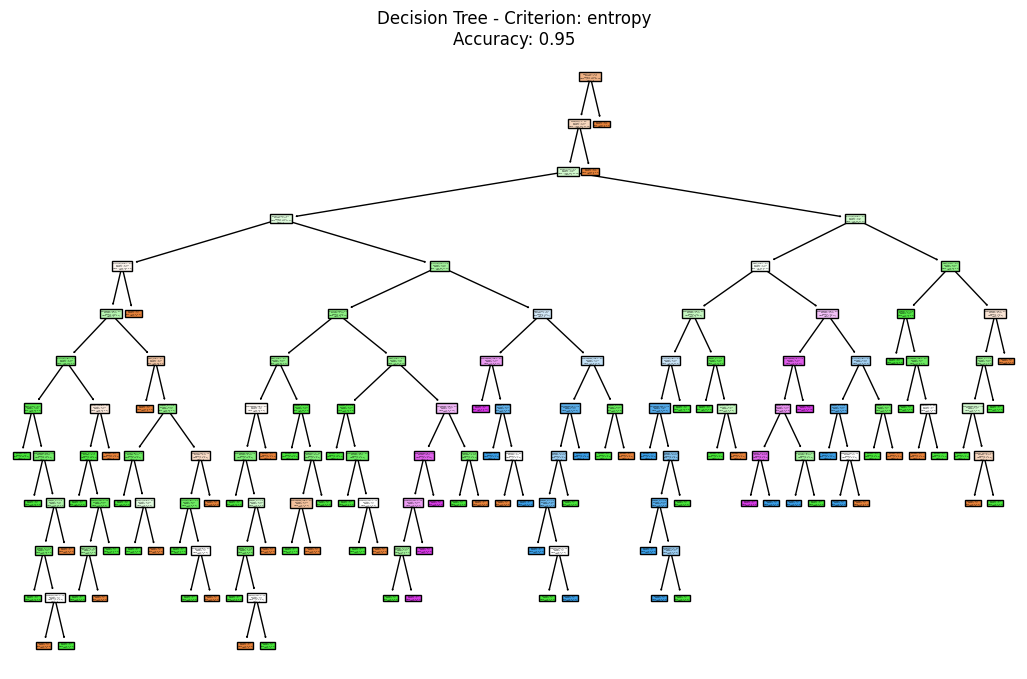

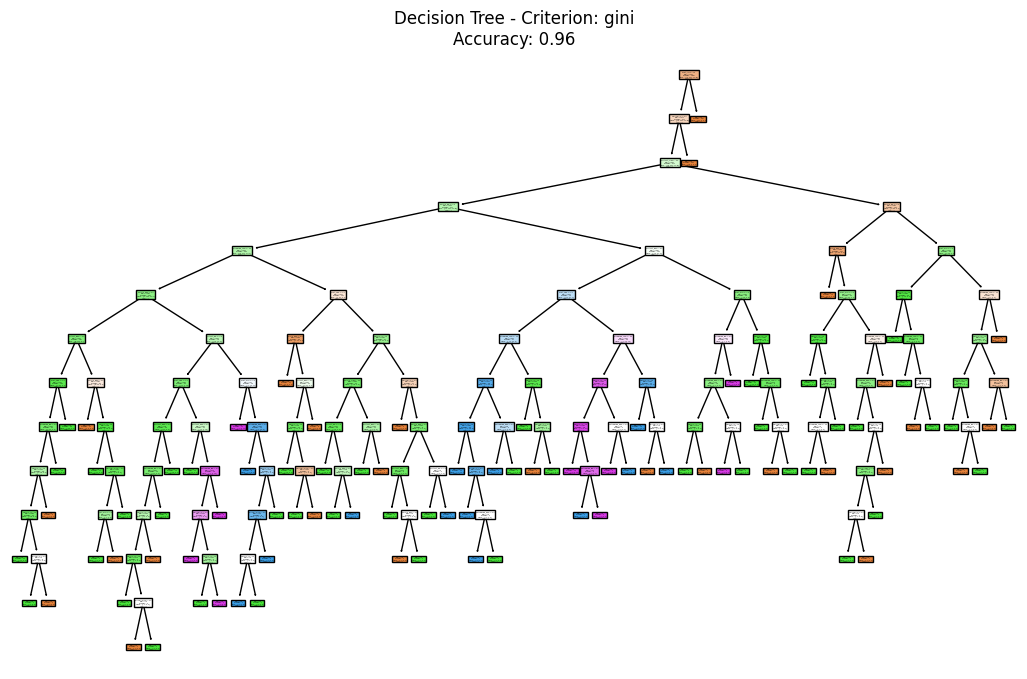

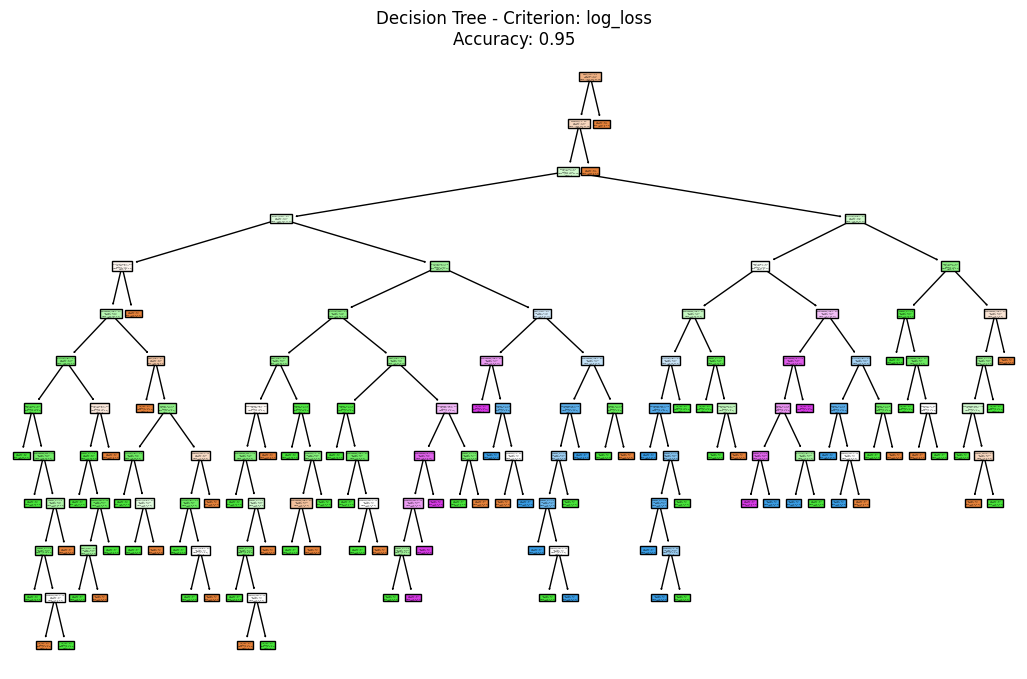

In [219]:
# Visualize the decision trees
for criterion, model_info in models.items():
    plt.figure(figsize=(13, 8))
    plot_tree(model_info['model'], filled=True, feature_names=list(X.columns), class_names=class_names_str)
    plt.title(f'Decision Tree - Criterion: {criterion}\nAccuracy: {model_info["accuracy"]:.2f}')
    plt.show()

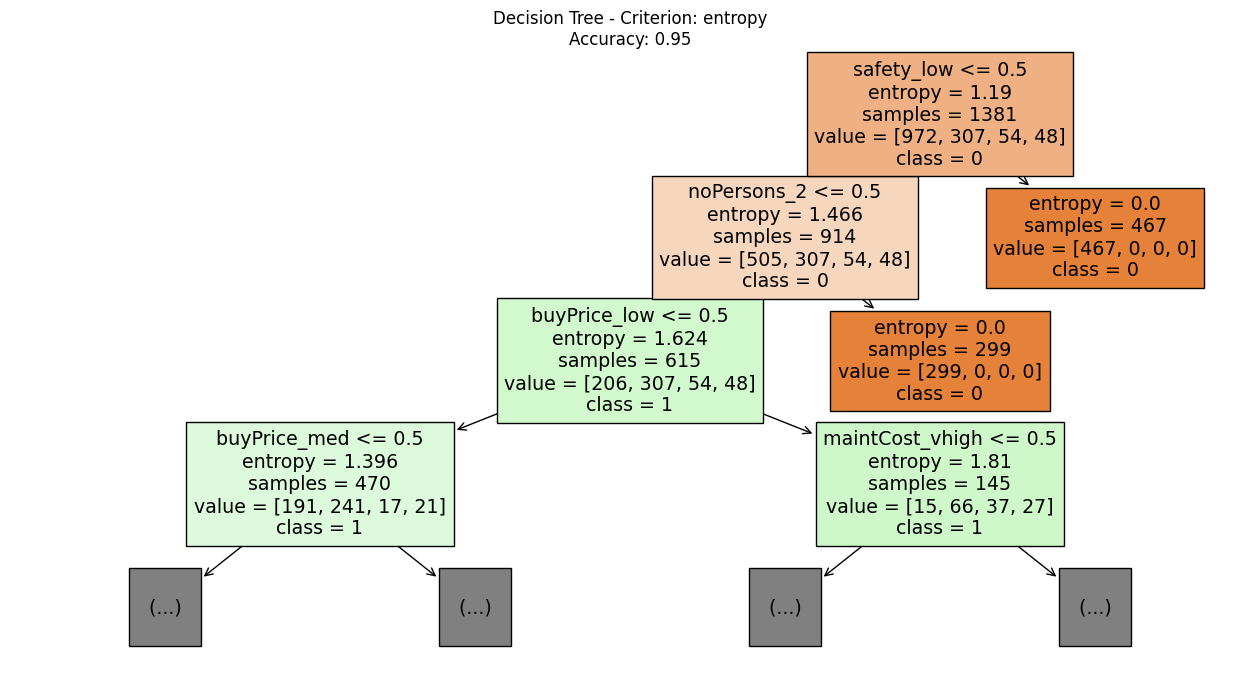

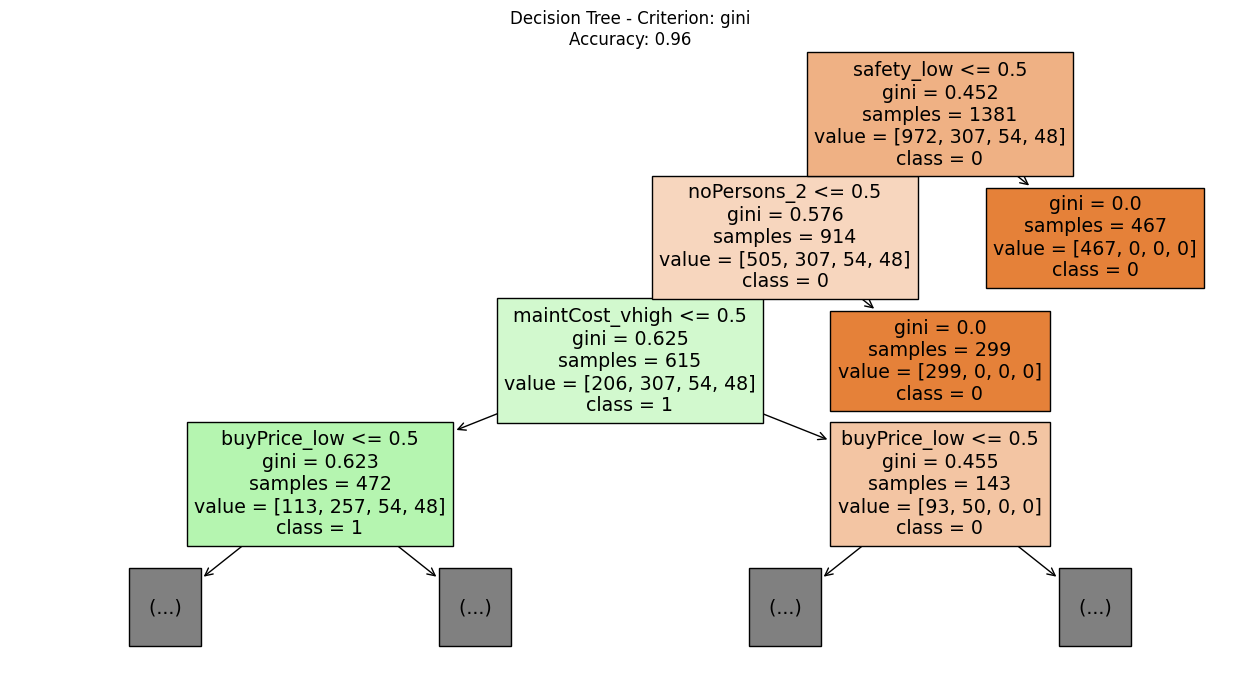

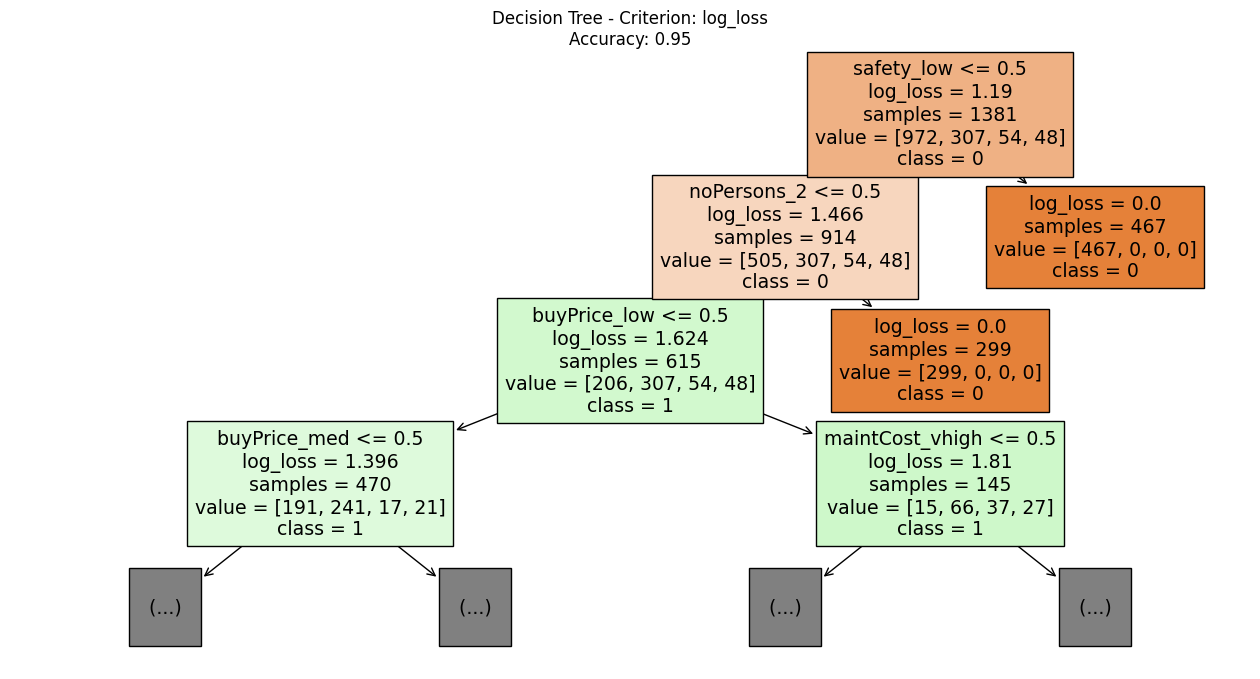

In [220]:
# Visualize the decision trees
for criterion, model_info in models.items():
    # Plot the decision tree with adjusted styling
    plt.figure(figsize=(16, 8))
    plt.rcParams.update({'font.size': 10})
    plot_tree(model_info['model'], filled=True, feature_names=list(X.columns), class_names=list(y.unique().astype(str)), max_depth=3)

    # Add title with accuracy information
    plt.title(f'Decision Tree - Criterion: {criterion}\nAccuracy: {model_info["accuracy"]:.2f}')

    # Show the plot
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Split the data into features (X) and target variable (y)
X = df.drop('decision', axis=1)
y = df['decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################